# Computer Vision. Images as Tensors

Computer Vision (CV) is a field that studies how computers can gain some degree of understanding from digital images and/or video. *Understanding* in this definition has a rather broad meaning - it can range from being able to distinguish between a cat and a dog on the picture, to more complex tasks such as describing the image in natural language.

The most common problems of computer vision include:

* **Image Classification** is the simplest task, when we need to classify an image into one of many pre-defined categories, for example, distinguish a cat from a dog on a photograph, or recognize a handwritten digit.

* **Object Detection** is a bit more difficult task, in which we need to find known objects on the picture and localize them, that is, return the **bounding box** for each of recognized objects.

* **Segmentation** is similar to object detection, but instead of giving bounding box we need to return an exact pixel map outlining each of the recognized objects.  

![An image showing how computer vision object detection can be performed with cats, dogs, and ducks.](images/2-image-data-1.png)

Image taken from [CS224d Stanford Course](https://cs224d.stanford.edu/index.html)

We’ll focus on **image classification** task, and how neural networks can be used to solve it. As with any other machine learning tasks, to train a model for classifying images we’ll need a labeled dataset, that is, a large number of images for each of the classes. 


计算机视觉（CV）是一个研究计算机如何从数字图像和/或视频中获得某种程度的理解的领域。在这个定义中，*理解*具有相当广泛的含义--它的范围可以从能够区分图片上的一只猫和一只狗，到更复杂的任务，如用自然语言描述图像。

计算机视觉最常见的问题包括。

**图像分类**是最简单的任务，当我们需要将图像分类到许多预先定义的类别中，例如，区分照片上的猫和狗，或者识别手写的数字。

**物体检测**是一个比较困难的任务，我们需要在图片上找到已知的物体并对其进行定位，也就是说，返回每个被识别物体的**边界框**。

**分割**类似于物体检测，但我们需要返回一个精确的像素图，而不是给出边界框，以勾勒出每个被识别物体的轮廓。 

![一张显示计算机视觉物体检测如何用猫、狗和鸭子进行的图片。](images/2-image-data-1.png)

图片取自[CS224d Stanford Course](https://cs224d.stanford.edu/index.html)

我们将专注于**图像分类**任务，以及如何用神经网络来解决它。与其他机器学习任务一样，为了训练图像分类的模型，我们需要一个标记的数据集，也就是说，每个类别都有大量的图像。


## Images as Tensors

Computer Vision works with Images. As you probably know, images consist of pixels, so they can be thought of as a rectangular collection (array) of pixels.

In the first part of this tutorial, we will deal with handwritten digit recognition. We will use the MNIST dataset, which consists of grayscale images of handwritten digits, 28x28 pixels. Each image can be represented as 28x28 array, and elements of this array would denote intensity of corresponding pixel - either in the scale of range 0 to 1 (in which case floating point numbers are used), or 0 to 255 (integers). A popular python library called `numpy` is often used with computer vision tasks, because it allows to operate with multidimensional arrays effectively.

To deal with color images, we need some way to represent colors. In most cases, we represent each pixel by 3 intensity values, corresponding to Red (R), Green (G) and Blue (B) components. This color encoding is called RGB, and thus color image of size $W\times H$ will be represented as an array of size $3\times H\times W$ (sometimes the order of components might be different, but the idea is the same).

计算机视觉与图像一起工作。 您可能知道，图像由像素组成，因此可以将它们视为像素的矩形集合（数组）。

在本教程的第一部分，我们将处理手写数字识别。 我们将使用 MNIST 数据集，它由手写数字的灰度图像组成，28x28 像素。 每个图像都可以表示为 28x28 数组，该数组的元素将表示相应像素的强度 —— 范围为 0 到 1（在这种情况下使用浮点数），或 0 到 255（整数）。 一个名为 `numpy` 的流行 Python 库经常用于计算机视觉任务，因为它允许有效地处理多维数组。

为了处理彩色图像，我们需要一些方法来表示颜色。 在大多数情况下，我们用 3 个强度值表示每个像素，分别对应红色 (R)、绿色 (G) 和蓝色 (B) 分量。 这种颜色编码称为 RGB，因此大小为 $W\times H$ 的彩色图像将表示为大小为 $3\times H\times W$ 的数组（有时组件的顺序可能不同，但想法是 相同的）。

![Grayscale Image](images/2-image-data-2.png) | ![RGB Image](images/2-image-data-3.png)
------|------
5x5 Grayscale Image | 5x5 Color (RGB) Image

Using multi-dimensional arrays to represent images also has an advantage, because we can use an extra dimension to store a sequence of images. For example, to represent a video fragment consisting of 200 frames with 800x600 dimension, we may use the tensor of size 200x3x600x800.

Multi-dimensional arrays are also called **tensors**. Usually, we refer to tensors when we speak about some neural network framework, such as PyTorch. The main difference between tensors in PyTorch and numpy arrays is that tensors support parallel operations on GPU, if it is available. Also, PyTorch offers additional functionality, such as automatic differentiation, when operating on tensors.  

使用多维数组来表示图像也有一个优势，因为我们可以使用一个额外的维度来存储图像序列。 例如，要表示一个由 200 帧和 800x600 维度组成的视频片段，我们可以使用大小为 200x3x600x800 的张量。

多维数组也称为**张量**。 通常，当我们谈论一些神经网络框架时，我们指的是张量，例如 PyTorch。 PyTorch 中的张量和 numpy 数组之间的主要区别在于张量支持 GPU 上的并行操作（如果GPU可用）。 此外，PyTorch 在对张量进行运算时还提供了额外的功能，例如自动微分。

## Import packages and load the MNIST Dataset

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/requirements.txt

In [2]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

PyTorch has a [number of datasets](https://pytorch.org/vision/stable/datasets.html) available right from the library. Here we are using the well-known [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits, available through `torchvison.datasets.MNIST` in PyTorch. The dataset object returns the data in the form of Python Imagine Library (PIL) images, which we convert to tensors by passing a `transform=ToTensor()` parameter. 

When using your own notebooks, you can also experiment with the other built in datasets, in particular [FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist).


PyTorch有一个[数字数据集](https://pytorch.org/vision/stable/datasets.html)，可以直接从库中获得。这里我们使用著名的[MNIST](http://yann.lecun.com/exdb/mnist/)手写数字数据集，可通过PyTorch中的`torchvison.datasets.MNIST`获得。数据集对象以Python Imagine Library（PIL）图像的形式返回数据，我们通过传递`transform=ToTensor()`参数将其转换为张量。

当使用你自己的笔记本时，你也可以尝试使用其他内置的数据集，特别是[FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)。

In [3]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Using downloaded and verified file: ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Using downloaded and verified file: ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Using downloaded and verified file: ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Visualizing the dataset
Now that we have downloaded the dataset we can visualize some of the digits

现在我们已经下载了数据集，我们可以可视化一些数字

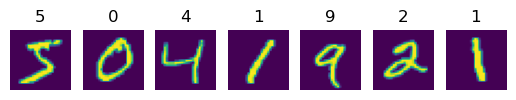

In [4]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

## Dataset structure

We have a total of 6000 training images and 1000 testing images. Its important to split out the data for training and testing. We also want to do some data exploration to get a better idea of what our data looks like

Each sample is a tuple in the following structure:
 * First element is the actual image of a digit, represented by a tensor of shape 1x28x28
 * Second element is a **label** that specifies which digit is represented by the tensor. It is a tensor that contains a number from 0 to 9.

`data_train` is a training dataset that we will use to train our model on. `data_test` is a smaller test dataset that we can use to verify our model. 


我们总共有 6000 张训练图像和 1000 张测试图像。 拆分数据进行训练和测试很重要。 我们还想进行一些数据探索，以更好地了解我们的数据是什么样的

每个样本都是以下结构中的一个元组：
  * 第一个元素是数字的实际图像，由形状为 1x28x28 的张量表示
  * 第二个元素是一个**标签**，指定张量表示哪个数字。 它是一个包含 0 到 9 之间的数字的张量。

`data_train` 是一个训练数据集，我们将使用它来训练我们的模型。 `data_test` 是一个较小的测试数据集，我们可以使用它来验证我们的模型。

In [9]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


All pixel intensities of the images are represented by floating-point values in between 0 and 1:

图像的所有像素强度均由 0 到 1 之间的浮点值表示：

In [10]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


## Loading your own images

In most of the practical applications, you would have your own images located on disk that you want to use to train your neural network. In this case, you need to load them into PyTorch tensors. 

One of the ways to do that is to use one of the Python libraries for image manipulation, such as *Open CV*, or *PIL/Pillow*, or *imageio*. Once you load your image into numpy array, you can easily convert it to tensors. 

> It is important to make sure that all values are scaled to the range [0..1] before you pass them to a neural network - it is the usual convention for data preparation, and all default weight initializations in neural networks are designed to work with this range. `ToTensor` transform that we have seen above automatically scales PIL/numpy images with integer pixel values into [0..1] range.

Even better approach is to use functionality in **Torchvision** library, namely `ImageFolder`. It does all the preprocessing steps automatically, and also assigns labels to images according to the directory structure. We will see the example of using `ImageFolder` later in this course, once we start classifying our own cats and dogs images.

> It is important to note that all images should be scaled to the same size. If your original images have different aspect ratios, you need to decide how to handle this scaling - either by cropping images, or by padding extra space.

在大多数实际应用中，您会在磁盘上拥有自己的图像，您希望使用这些图像来训练您的神经网络。 在这种情况下，您需要将它们加载到 PyTorch 张量中。

其中一种方法是使用 Python 库之一进行图像处理，例如 *Open CV*、*PIL/Pillow* 或 *imageio*。 一旦将图像加载到 numpy 数组中，就可以轻松地将其转换为张量。

> 在将所有值传递给神经网络之前，确保所有值都缩放到范围 [0..1] 非常重要 - 这是数据准备的通常惯例，神经网络中的所有默认权重初始化都旨在 在这个范围内工作。 我们在上面看到的“ToTensor”转换自动将具有整数像素值的 PIL/numpy 图像缩放到 [0..1] 范围内。

更好的方法是使用 **Torchvision** 库中的功能，即 ImageFolder。 它自动完成所有预处理步骤，并根据目录结构为图像分配标签。 一旦我们开始对自己的猫和狗图像进行分类，我们将在本课程的后面看到使用 `ImageFolder` 的示例。

> 重要的是要注意所有图像都应该缩放到相同的大小。 如果您的原始图像具有不同的宽高比，您需要决定如何处理这种缩放——通过裁剪图像或填充额外空间。

## Takeaway

Neural networks work with tensors, and before training any models we need to convert our dataset into a set of tensors. This will often require rWe have loaded training and test datasets, and we are ready to start training our first neural network!

神经网络使用张量，在训练任何模型之前，我们需要将数据集转换为一组张量。 这通常需要我们加载训练和测试数据集，我们准备开始训练我们的第一个神经网络！